In [1]:
from stopsignalmetrics import SSRTmodel, PostStopSlow, Violations, Summary


import matplotlib.pyplot as plt
import seaborn as sns

# MTURK DATA

In [2]:
variable_dict = {
   "columns": {
      "ID": "worker_id",
      "block": "current_block",
      "condition": "SS_trial_type",
      "SSD": "SS_delay",
      "goRT": "rt",
      "stopRT": "rt",
      "response": "key_press",
      "correct_response": "correct_response",
      "choice_accuracy": "choice_accuracy"
   },
   "key_codes": {
      "go": "go",
      "stop": "stop",
      "correct": 1,
      "incorrect": 0
   }
}
stop_data = StopData(var_dict=variable_dict)

NameError: name 'StopData' is not defined

# 1 Subject

In [27]:
subj_file = 'example_data/stop_signal_single_task_network_A3QAHF4UUBM7ZO.csv'
subj_df = pd.read_csv(subj_file, index_col=0)
cleaned_subj = stop_data.fit_transform(subj_df)

In [28]:
ssrt_model = SSRTmodel(model='all')
metrics = ssrt_model.fit_transform(cleaned_subj)
metrics

{'SSRT': {'mean': 301.53228449688623,
  'integration': 279.6296296296296,
  'omission': 282.6296296296296,
  'replacement': 282.6296296296296},
 'mean_SSD': 295.3703703703704,
 'p_respond': 0.5,
 'max_RT': 1675.0,
 'mean_go_RT': 596.9026548672566,
 'mean_stopfail_RT': 520.8888888888889,
 'omission_count': 1,
 'omission_rate': 0.008771929824561403,
 'go_acc': 0.911504424778761,
 'stopfail_acc': 0.0}

# Group 1

In [13]:
group_file = 'example_data/stop_signal_single_task_network.csv'
group_df = pd.read_csv(group_file, index_col=0)
group_df = group_df.reset_index()

cleaned_group = stop_data.fit_transform(group_df)
cleaned_group

,SSD,SS_duration,SS_stimulus,condition,att_check_percent,block_duration,correct,correct_response,original_correcttrial,block,...,stop_acc,stop_signal_condition,time_elapsed,timing_post_trial,trial_id,ID,correct_trial,goRT,stopRT,choice_accuracy
0,NaN,500.0,<img class = center src='/static/experiments/s...,go,NaN,2000.0,NaN,90.0,1.0,0.0,...,NaN,go,98287,0.0,test_trial,A3QAHF4UUBM7ZO,1,622.0,NaN,1
1,NaN,500.0,<img class = center src='/static/experiments/s...,go,NaN,2000.0,NaN,77.0,1.0,0.0,...,NaN,go,100791,0.0,test_trial,A3QAHF4UUBM7ZO,1,519.0,NaN,1
2,NaN,500.0,<img class = center src='/static/experiments/s...,go,NaN,2000.0,NaN,77.0,1.0,0.0,...,NaN,go,103296,0.0,test_trial,A3QAHF4UUBM7ZO,1,491.0,NaN,1
3,NaN,500.0,<img class = center src='/static/experiments/s...,go,NaN,2000.0,NaN,77.0,1.0,0.0,...,NaN,go,105801,0.0,test_trial,A3QAHF4UUBM7ZO,1,389.0,NaN,1
4,NaN,500.0,<img class = center src='/static/experiments/s...,go,NaN,2000.0,NaN,77.0,1.0,0.0,...,NaN,go,108307,0.0,test_trial,A3QAHF4UUBM7ZO,1,314.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,NaN,500.0,<img class = center src='/static/experiments/s...,go,NaN,2000.0,NaN,90.0,1.0,2.0,...,NaN,go,683864,0.0,test_trial,A2581F7TDPAMBQ,1,747.0,NaN,1
4748,400.0,500.0,<img class = center src='/static/experiments/s...,stop,NaN,2000.0,NaN,-1.0,0.0,2.0,...,0.0,stop,686479,0.0,test_trial,A2581F7TDPAMBQ,0,NaN,654.0,0
4749,NaN,500.0,<img class = center src='/static/experiments/s...,go,NaN,2000.0,NaN,90.0,1.0,2.0,...,NaN,go,689000,0.0,test_trial,A2581F7TDPAMBQ,1,680.0,NaN,1
4750,NaN,500.0,<img class = center src='/static/experiments/s...,go,NaN,2000.0,NaN,77.0,1.0,2.0,...,NaN,go,691512,0.0,test_trial,A2581F7TDPAMBQ,1,586.0,NaN,1


In [14]:
ssrt_model = SSRTmodel()
cleaned_group.groupby('ID').apply(ssrt_model.fit_transform).apply(pd.Series)

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc
ID,,,,,,,,,,
A1DS5O8MSI3ZH0,186.385417,435.416667,0.500000,845.0,621.802083,592.708333,0.0,0.000000,1.000000,0.0
A1L1SQ488YCCFJ,247.562500,308.333333,0.500000,1190.0,555.895833,493.291667,0.0,0.000000,0.968750,0.0
A1OSRAPSRT934Z,269.210993,610.416667,0.520833,1425.0,879.627660,743.240000,2.0,0.020833,0.989362,0.0
A1R0689JPSQ3OF,256.781250,645.833333,0.458333,1216.0,902.614583,807.727273,0.0,0.000000,1.000000,0.0
A1TS2SKXPX7ZED,266.250000,337.500000,0.500000,1139.0,603.750000,508.166667,0.0,0.000000,1.000000,0.0
A1VCAMP3XM62R4,198.625000,400.000000,0.500000,829.0,598.625000,533.583333,0.0,0.000000,1.000000,0.0
A1YC558J4E5KZ,247.489583,412.500000,0.479167,1140.0,659.989583,609.217391,0.0,0.000000,1.000000,0.0
A2581F7TDPAMBQ,294.041667,350.000000,0.479167,971.0,644.041667,573.652174,0.0,0.000000,1.000000,0.0
A2DWPP1KKAY0HG,275.020833,325.000000,0.500000,1011.0,600.020833,501.666667,0.0,0.000000,1.000000,0.0


In [15]:
Summary().fit_transform(cleaned_group, level='group')

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,post_stop_slow,post_stop_success_slow,post_stop_fail_slow,mean_violation
ID,,,,,,,,,,,,,,
A1DS5O8MSI3ZH0,191.583333,435.416667,0.500000,845.0,621.802083,592.708333,0.0,0.000000,1.000000,0.0,-1.952381,-22.444444,13.416667,NaN
A1L1SQ488YCCFJ,231.666667,308.333333,0.500000,1190.0,555.895833,493.291667,0.0,0.000000,0.968750,0.0,-2.869565,-10.916667,5.909091,NaN
A1OSRAPSRT934Z,347.583333,610.416667,0.520833,1425.0,879.627660,743.240000,2.0,0.020833,0.989362,0.0,58.789474,88.100000,26.222222,NaN
A1R0689JPSQ3OF,250.166667,645.833333,0.458333,1216.0,902.614583,807.727273,0.0,0.000000,1.000000,0.0,-57.388889,-107.153846,72.000000,NaN
A1TS2SKXPX7ZED,255.500000,337.500000,0.500000,1139.0,603.750000,508.166667,0.0,0.000000,1.000000,0.0,42.650000,37.333333,47.000000,NaN
A1VCAMP3XM62R4,192.000000,400.000000,0.500000,829.0,598.625000,533.583333,0.0,0.000000,1.000000,0.0,-32.772727,-77.300000,4.333333,NaN
A1YC558J4E5KZ,224.500000,412.500000,0.479167,1140.0,659.989583,609.217391,0.0,0.000000,1.000000,0.0,38.250000,99.125000,-22.625000,NaN
A2581F7TDPAMBQ,282.000000,350.000000,0.479167,971.0,644.041667,573.652174,0.0,0.000000,1.000000,0.0,-75.714286,-99.555556,-32.800000,NaN
A2DWPP1KKAY0HG,274.000000,325.000000,0.500000,1011.0,600.020833,501.666667,0.0,0.000000,1.000000,0.0,22.571429,-63.000000,56.800000,NaN


In [16]:
Violations().fit_transform(cleaned_group, level='group')

,ID,SSD,n_go_stopfail_pairs,mean_violation,mean_stopFailureRT,mean_precedingGoRT
0,A1DS5O8MSI3ZH0,400.0,3,-65.000000,479.333333,544.333333
1,A1DS5O8MSI3ZH0,450.0,5,51.200000,596.800000,545.600000
2,A1DS5O8MSI3ZH0,500.0,5,-6.800000,632.800000,639.600000
3,A1DS5O8MSI3ZH0,550.0,2,-14.500000,737.000000,751.500000
4,A1L1SQ488YCCFJ,300.0,6,-113.500000,452.166667,565.666667
...,...,...,...,...,...,...
108,AVMIXXCHPD291,750.0,3,-132.000000,889.333333,1021.333333
109,AY7WPVKHVNBLG,200.0,4,-5.750000,376.750000,382.500000
110,AY7WPVKHVNBLG,250.0,7,-128.571429,425.428571,554.000000
111,AY7WPVKHVNBLG,300.0,5,-41.200000,446.200000,487.400000


# Group 2 Recreating Figure 1b

In [17]:
# load in data
group2_file = 'example_data/DataFixedSSDs2.xlsx'
group2_df = pd.read_excel(group2_file)
group2_df = group2_df.replace(r'^\s*$', np.nan, regex=True).replace('?', np.nan)

#build up "correct" responses for stop trials
addon_file = 'example_data/FixedSSD2StopTrialChoiceAccuracyInput.xlsx'
addon_df = pd.read_excel(addon_file)

group2_df['StopTrialCorrectResponse'] = np.nan

# circle response
for shape in ['Circle', 'Rhombus', 'Square', 'Triangle']:
    group2_df.loc[(group2_df['TrialType']=='stop') & (addon_df['Unnamed: 5']==f'{shape.lower()}.bmp'), 'StopTrialCorrectResponse'] = \
    addon_df.loc[(group2_df['TrialType']=='stop') & (addon_df['Unnamed: 5']==f'{shape.lower()}.bmp'), f'{shape}Response']

#combine go and stop into single columns
group2_df['response'] = np.where(group2_df['GoTrialResponse'].isnull(), group2_df['StopTrialResponse'], group2_df['GoTrialResponse'])
group2_df['CorrectResponse'] = np.where(group2_df['GoTrialCorrectResponse'].isnull(), group2_df['StopTrialCorrectResponse'], group2_df['GoTrialCorrectResponse'])
group2_df['CorrectResponse'] = group2_df['CorrectResponse'].str.lower()

# Preprocess data

In [18]:
variable_dict = {
   "columns": {
      "ID": "Subject",
      "block": "Block",
      "condition": "TrialType",
      "SSD": "StopSignalDelay",
      "goRT": "GoRT",
      "stopRT": "StopFailureRT",
      "response": "response",
      "correct_response": "CorrectResponse",
      "choice_accuracy": "choice_accuracy"
   },
   "key_codes": {
      "go": "go",
      "stop": "stop",
      "correct": 1,
      "incorrect": 0
   }
}

stop_data = StopData(var_dict=variable_dict)
cleaned_df = stop_data.fit_transform(group2_df)

# Get Group Violations - 1 line!

In [19]:
va_df = Violations().fit_transform(cleaned_df, level='group')

# Make a pretty & compelling plot

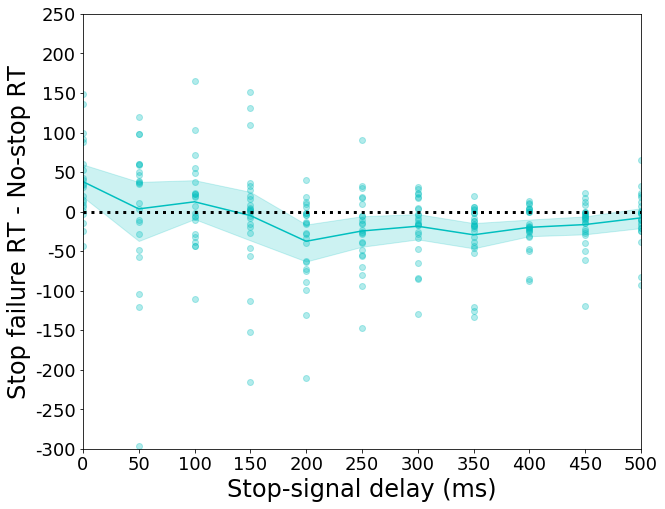

In [20]:
# Pivot & Plot
pivot_df = va_df.pivot_table(values='mean_violation', index=['SSD'],
                        columns=['ID'])


fig = plt.figure(figsize=(10,8))
plt.plot(pivot_df, linewidth=0, color='c', marker='o', alpha=.3, ) #plot individuals
ax = sns.lineplot(x='SSD', y="mean_violation", data=va_df, color='c')
ax.axis([0,500,-300,250])
ax.plot([0,pivot_df.index.max()],[0,0],color='k',linestyle=':',linewidth=3)

xticks=np.arange(0,pivot_df.index.max()+50,50)
xticks = [int(i) for i in xticks]
if len(xticks)> 16:
    xticks = [i for i in xticks if i%100==0]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize=18) 
yticks=np.arange(-300,250+50,50)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks,fontsize=18)

ax.set_xlabel('Stop-signal delay (ms)',fontsize=24)
_ = ax.set_ylabel('Stop failure RT - No-stop RT',fontsize=24) 
plt.show()
plt.close()